In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("C:/Users/Harshit/Desktop/marketing_campaign.csv", sep='\t')

In [4]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1084,6072,1970,Master,Single,75345.0,0,0,02-02-2013,16,918,...,3,0,0,0,1,0,0,3,11,1
1796,7002,1955,Graduation,Single,62535.0,0,1,03-10-2013,13,163,...,3,0,0,0,0,0,0,3,11,0
541,10591,1969,Graduation,Widow,43638.0,0,1,06-08-2012,37,63,...,7,0,0,0,0,0,0,3,11,0
826,9499,1954,Graduation,Married,93404.0,1,2,07-05-2013,97,1279,...,5,0,1,1,0,0,0,3,11,0
997,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [16]:
# Handle missing values
# Impute missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute missing values for categorical columns with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [19]:
df = pd.get_dummies(df, drop_first=True)

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

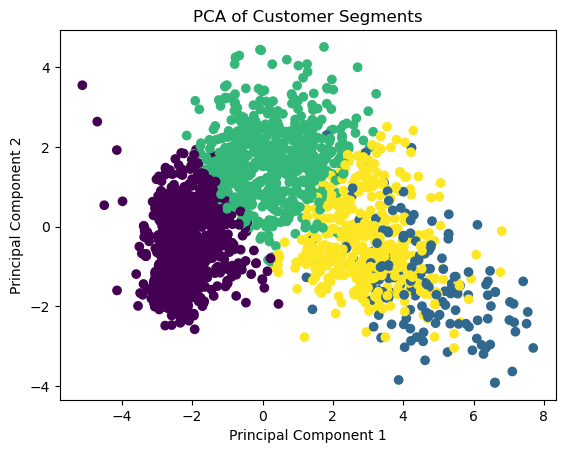

In [21]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numerical_cols])

# Visualize clusters after PCA
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA of Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()